In [1]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import scipy.linalg as la

# Analyse en composantes principales (ACP)

**Objectif :** Analyser les (cor-)relations entre des variables, choisir un plan permettant de visualiser au moieux le nuage de points.

Pas de modèle linéaire sous-jacent.

On travaille sur le fichier iris.csv, qu'on importe sous la forme d'un Dataframe (de la bibliothèque pandas). Tout d'abord, on regarde les principales propriétés su Dataframe (nombre et types des variables, nombre d'individus)

In [2]:
# Importation du fichier iris.csv 

iris = pd.read_csv("iris.csv")
iris.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

In [3]:
# Principales caractéristiques du Dataframe

print(iris.shape) # Nombre de lignes et de colonnes
print(iris.columns) # Noms des colonnes
print(iris.dtypes) # Type de chacune des colonnes

(150, 5)
Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')
sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object


**Commentaire :** 

## Représentations graphiques des colonnes 2 par 2 (iris)

On commence par représenter graphisquement les nuages de points des couples de variables quantitatives.

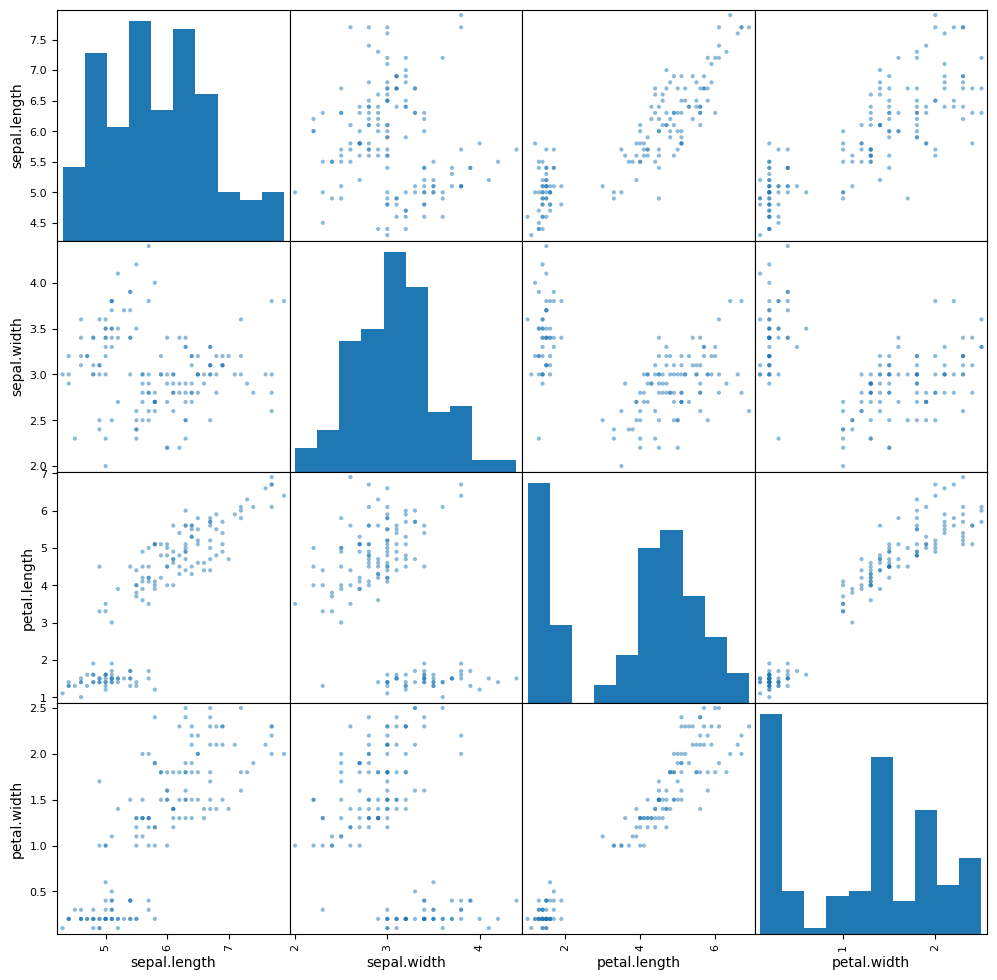

In [4]:
pd.plotting.scatter_matrix(iris,figsize=(12, 12)) # figsize : choisir la taille de la fenêtre graphique
plt.show()

**A faire :** Dresser le résumé numérique de chacune des variables quantitatives

**A ** faire :** Déterminer la moyenne de chaque variable et les matrices de covariance et de corrélation.

In [5]:
iris.mean()
iris.cov()
iris.corr()

/var/folders/gn/zgyhvgnd0675l0yxt_2vrq8r0000gp/T/ipykernel_57677/580762305.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  iris.mean()


sepal.length  sepal.width  petal.length  petal.width
sepal.length      1.000000    -0.117570      0.871754     0.817941
sepal.width      -0.117570     1.000000     -0.428440    -0.366126
petal.length      0.871754    -0.428440      1.000000     0.962865
petal.width       0.817941    -0.366126      0.962865     1.000000

### On étudie d'abord deux variables : longueur et largeur des pétales

**A faire :** Créer un dataframe df contenant ces deux variables et tracer le nuage de point.

In [6]:
df= ## A compléter

SyntaxError: invalid syntax (2475534543.py, line 1)

Créer un couple formé par les **moyennes**.

**Centrer le nuage de points :** on appelle dfc le nouveau jeu de données.

**Représenter le nouveau nuage de points.** Ajouter la commande plt.axis('equal') pour obtenir un tracé dans un repère orthonormal.

In [ ]:
m= # A compléter
dfc=
#plot à compléter
plt.axis('equal')

**A faire :** Calculer la matrice de covariance de dfc et vérifier la matrice obtenue, elle doit être de dimension 2x2 !

In [ ]:
V =  ## Calcul de la matrice de covariance à compléter
print(np.shape(V))

Finalement, on **standardise le nuage de points** $dfc$ en divisant les données par leur écart-type.

**Vérifier** que $dfs$ est centré et que les termes diagonaux de sa matrice de covariance sont tous égaux à 1. Noter R cette matrice de covariance.

**Tracer le nouveau nuage de points** (toujours dans un repère orthonormé).

In [ ]:
dfs=dfc/dfc.std() # df standardisée ou normalisée

# Moyennes ? Covariance  ?
# Tracé du nuage de points ?



**Que représente** $R$ pour le nuage de points initial ?

**Commentaire**



### Valeurs propres et vecteurs propres de la matrice de corrélation

On détermine les **valeurs propres et vecteurs propres** de la matrice de corrélation du nuage de points avec la fonction la.eigh. 

Donner **les valeurs propres** puis chacun des **vecteurs propres**.

On s'intéresse en priorité aux **vecteurs propres associés au plus grandes valeurs propres** de $R$. Pourquoi ?


In [ ]:
EigenV=la.eigh(R)
EigenV 

In [ ]:
valp=  # Valeurs propres, à compléter.
print(valp)

vectp= # Vecteurs propres, à compléter. Attention, les vecteurs propres sont donnés en lignes
print(vectp)


In [ ]:
vectp[:,0] , np.reshape( vectp[:,0] ,(2,1) ) # pour passer d'un vecteur ligne à un vecteur colonne
print(np.matmul(np.matmul(vectp,R),np.transpose(vectp))) # Une matrice diagonale

**Justifier** que la trace de la matrice de corrélation est égale à la dimension.

**Pourquoi les sommes cumulées des valeurs propres, divisées par la dimension, représentent-elles des pourcentages de variance expliquée ?**

**Pourquoi les vecteurs propres sont-ils orthogonaux ?**

**Commentaire :** 

### Ajouter sur le nuage de points les axes donnés par les vecteurs propres

Choisir un repère orthonormé et donner des couleurs différentes à ces 2 axes.

In [ ]:
a1 = np.mat( np.reshape( vectp[:,1] ,(2,1) ) ) # Axe principal F1, en rouge, 
                                               # vect. pr. associé à la plus grande valeur propre
a2 = np.mat( np.reshape( vectp[:,0] ,(2,1) ) ) # F2, en cyan
plt.figure(figsize=(5,5))
plt.plot(dfs["petal.length"],dfs["petal.width"],'o',label="iris")
plt.plot( [-1.5 ,1.5], [-1.5* a1[1,0]/a1[0,0],1.5* a1[1,0]/a1[0,0] ] ,'red',label="F1" )
plt.plot( [-1.5 ,1.5], [-1.5* a2[1,0]/a2[0,0],1.5* a2[1,0]/a2[0,0] ] ,'cyan',label="F2" )
plt.xlabel("petal.length Standard")
plt.ylabel("petal.width Standard")
plt.legend()
plt.title("Longueur et largeur des pétales et axes principaux")

## Tracer le nuage de points dans la base des vecteurs propres

Abscisse = axe associé à la plus grande valeur propre

On traduit maintenant les variables dans la base des vecteurs propres (donc des axes principaux).

In [ ]:
Newdf= # A compléter : Données à exprimer dans la base des vecteurs propres 
Newdf=Newdf.rename(columns={'petal.length':'F2','petal.width':'F1'}) # pour changer les noms des variables
# Les nouvelles variables sont des combinaisons linéaires des anciennes.
plt.plot(Newdf.iloc[:,1],Newdf.iloc[:,0],'o') 
plt.axis('equal')
plt.xlabel("F1")
plt.ylabel("F2")
plt.title("Nuage de points dans le repère des axes principaux")

**Ajouter des couleurs** pour différentier les variétés d'iris (information contenue dans la variable qualitative du dataframe).

In [ ]:
plt.title("Iris représentés dans le plan principal")
plt.axis('equal')
plt.plot(Newdf[0:50,1],Newdf[0:50,0],'o',c='r',label='Setosa')
plt.plot(Newdf[50:100,1],Newdf[50:100,0],'o',c='b',label='Versicolor')
plt.plot(Newdf[100:150:,1],Newdf[100:150,0],'o',c='g',label='Virginica')
plt.xlabel("F1")
plt.ylabel("F2")
plt.legend()
plt.show()

## Cercle des corrélations

On étudie les relations entre les variables initiales et les facteurs principaux : on projette les variables observées sur le plan des composantes principales. 

In [ ]:
couleurs=['blue','orange','purple','green']

X=vectp[:,1]
Y=vectp[:,0]

circle = plt.Circle((0, 0), 1, color='r' , fill=False) #centre, rayon

plt.figure()
fig, ax = plt.subplots() 
# note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

ax.set_xlim((-1, 1))
ax.set_ylim((-1, 1))

for i in range(len(X)):
    ax = plt.axes()
    ax.arrow(0, 0, 0.95*X[i], 0.95*Y[i],head_width=0.05, head_length=0.05,color=couleurs[i])
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.axis("equal")
plt.legend()
ax.add_patch(circle)


## Et maintenant tout le tableau de données

### Calcul des valeurs propres


In [ ]:
df=iris.iloc[:,0:4] #DataFrame avec uniquement des variables quantitatives

**A faire :** Centrer et réduire les données

In [ ]:
dfNorm=(df-df.mean())/df.std()
dfNorm.head()

**A faire :** Calculer la matrice de corrélation et ses valeurs propres.

In [ ]:
R= # corrélation du dataframe iris

In [ ]:
EigenV=la.eigh(R)
valp=EigenV[0] #Valeurs propres, par ordre croissant
((np.flip(valp))/len(valp)).cumsum() #Sommes cumulées des valeurs propres 
#                             (en commençant par la plus grande)

**Quel est le pourcentage de la variance expliquée par le plan principal (ie celui formé par les vecteurs propres associés aux deux plus grandes valeurs propres) ?**

In [ ]:
vectp=EigenV[1] #Vecteurs propres
#vectp 
Newdf= # A compléter : Coordonnées des individus dans la nouvelle base
Newdf=Newdf.rename(columns={'sepal.length':'P4','sepal.width':'P3','petal.length':'P2','petal.width':'P1'})
# On a changé les noms des colonnes : les nouvelles colonnes sont des combinaisons linéaires des anciennes colonnes
# Les valeurs propres sont dans l'ordre croissant : on s'intéresse en priorité aux coordonnées dans la base des 
# 2 derniers vecteurs propres
Newdf.head()

**A faire :** Déterminer les coordonnées $(x_i,y_i)$ des observations projetées sur le plan des vecteurs propres des plus grandes valeurs propres. 

Tracer le nuage de points sur ce plan.

In [ ]:
# Les observations projetées sur le plan des vecteurs propres des plus grandes valeurs propres
x=## A compléter
y=## A compléter

In [ ]:
plt.title("Iris représentés dans le plan principal")
plt.axis('equal')
plt.plot(x[0:50],y[0:50],'o',c='r',label='Setosa')
plt.plot(x[50:100],y[50:100],'o',c='b',label='Versicolor')
plt.plot(x[100:150],y[100:150],'o',c='g',label='Virginica')
plt.xlabel("F1")
plt.ylabel("F2")
plt.legend()
plt.show()

In [ ]:
# Cercle des corrélations : on projette les variables sur le plan des composantes principales
X= # A compléter : abscisses des variables projetées
Y= # A compléter : ordonnées des variables projetées
circle = plt.Circle((0, 0), 1, color='r' , fill=False)
couleurs=['blue','orange','purple','green']
plt.figure()
fig, ax = plt.subplots() 

plt.xlim([-1,1.5]) # pour pouvoir mettre la légende proprement,
plt.ylim([-1,1.5]) # on agrandit un peu la fenêtre
plt.axis("equal") # repère orthonormé
ax.add_patch(circle) # on trace le cercle
for i in range(len(X)):
    plt.plot([0,X[i]],[0,Y[i]],'-',color=couleurs[i],label=iris.columns[i])
plt.legend()
np.shape(X)